# 3. 채용 데이터 텍스트 분석

- 텍스트 분석 수행 프로세스: 텍스트 전처리 -> 피처 벡터화/추출 ->ML모델 수립 및 학습/예측/평가

## 3-1 크롤링 데이터에서 분석할 데이터 추출

In [1]:
#크롤링한 채용 데이터 가져오기
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

base = pd.read_csv("jumpit_crawling_데이터 엔지니어_2024-02-19.csv", index_col='Unnamed: 0')
base.head(1)

C:\Users\dianacho\AppData\Local\Temp\ipykernel_32468\2777357328.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,company,title,url,city,district,remain_address,career,education_date,stack,main_task,qualification,more,duetime,years_of_experience,established_date,total_employees,company_type,view
0,워트인텔리전스,[워트 개발팀] 데이터 엔지니어 모집 (국내 최대 데이터),https://www.jumpit.co.kr/position/7326,서울시,서초구,"강남대로 507, 6층",경력 2~10년,대학교졸업(4년) 이상,"MongoDB, BigData, REST API, Hadoop, Java, Luce...","다양한 서비스를 제공하기 위해 Airflow를 활용한 데이터 파이프라인 구축, 데이...","• Java, Python, SQL 을 다루는데 어려움이 없으신 분\n• Linux...","• 검색서비스 개발과 자연어 처리 경험 보유자 우대\n• 머신러닝, 딥러닝 기반 업...",상시,10.0,2015-5-27,40.0,"중소기업, 주식회사, 사단법인",370


In [2]:
#채용 정보 중에 텍스트 분석할 텍스트만 가져오기 (기술, 필요사항, 우대사항)
base_00 = base[['stack', 'qualification', 'more']]
base_00.head()

,stack,qualification,more
0,"MongoDB, BigData, REST API, Hadoop, Java, Luce...","• Java, Python, SQL 을 다루는데 어려움이 없으신 분\n• Linux...","• 검색서비스 개발과 자연어 처리 경험 보유자 우대\n• 머신러닝, 딥러닝 기반 업..."
1,"Git, MongoDB, Amazon DynamoDB, FastAPI, Airflo...",• Python을 활용한 데이터 처리 경험이 있는 분\n• 데이터 프로세싱을 위한 ...,• GIS를 활용한 데이터 구조화가 가능한 분\n• 지역 기반의 상권 및 매출 관련...
2,"AI/인공지능, BigData, C++, DeepLearning, NLP, Tens...","• 학력: 학사 이상\n• 경력 신입 가능\n• 파이썬/C/C++및 영상처리, 음성...",• 대학원(석사) 이상\n• 관련 딥러닝 모델 연구/개발자 우대 (Tensor Fl...
3,"QlikView, Java, Python, PowerBI, Microsoft Pow...",• 모집직급: 대리 ~ 과장 \n• MS Power Platform 구축 / 운영 ...,"• MS Azure 및 전산관련 자격증 보유 \n• 빅데이터 통계분석, DW&DM..."
4,"Etl, NoSql, Java, Python",• 데이터 엔지니어링 및 인프라 개발/운영 경력이 3년 이상 이거나 이에 준하는 실...,• 분산처리기술 경험\n• 대용량 및 실시간 데이터 분산 처리 시스템 개발 경험\n...


In [40]:
base_00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stack          273 non-null    object
 1   qualification  273 non-null    object
 2   more           273 non-null    object
dtypes: object(3)
memory usage: 6.5+ KB


In [41]:
#나눠져 있는 텍스트를 하나의 말뭉치로 합치기
text_list = []
for index, row in base_00.iterrows():
    text = ''.join(row.astype(str))
    text_list.append(text)

text_list[0]


'MongoDB, BigData, REST API, Hadoop, Java, Lucene, AWS, Spring, Python, SQL• Java, Python, SQL 을 다루는데 어려움이 없으신 분\n• Linux 환경 하에 개발 및 시스템 운영 \n• 데이터 엔지니어 경력 2년 이상• 검색서비스 개발과 자연어 처리 경험 보유자 우대\n• 머신러닝, 딥러닝 기반 업무 경험 또는 플랫폼 개발 경험 보유자 우대'

## 3-2 특수문자 제거 & 텍스트 정규화

In [ ]:
!pip install konlpy
import konlpy
from konlpy.tag import Kkma, Komoran, Okt

In [52]:
import re
clean_text = []
for t in text_lower:
  text1 = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", t)
  text2 = okt.morphs(text1)
  clean_text.append(text2)

print(clean_text[0])
len(clean_text)
print(type(clean_text[0]))

['mongodb', 'bigdata', 'rest', 'api', 'hadoop', 'java', 'lucene', 'aws', 'spring', 'python', 'sql', 'java', 'python', 'sql', '을', '다루는데', '어려움', '이', '없으신', '분', '\n ', 'linux', '환경', '하', '에', '개발', '및', '시스템', '운영', '데이터', '엔지니어', '경력', '2년', '이상', '검색', '서비스', '개발', '과', '자연어', '처리', '경험', '보유', '자', '우대', '\n ', '머신', '러닝', '딥', '러닝', '기반', '업무', '경험', '또는', '플랫폼', '개발', '경험', '보유', '자', '우대']
<class 'list'>


In [60]:
#정제화된 단어 리스트를 하나의 말뭉치로 다시 합치기
clean_text2 = []
for t in clean_text:
    text = ' '.join(t)
    clean_text2.append(text)
    
clean_text2[0]

'mongodb bigdata rest api hadoop java lucene aws spring python sql java python sql 을 다루는데 어려움 이 없으신 분 \n  linux 환경 하 에 개발 및 시스템 운영 데이터 엔지니어 경력 2년 이상 검색 서비스 개발 과 자연어 처리 경험 보유 자 우대 \n  머신 러닝 딥 러닝 기반 업무 경험 또는 플랫폼 개발 경험 보유 자 우대'

In [86]:
#회사명과 함께 분석할 최종 말뭉치 데이터프레임 만들기
data = {'company': base['company'],
              'text': clean_text2}

df = pd.DataFrame(data)
df.head()

,company,text
0,워트인텔리전스,mongodb bigdata rest api hadoop java lucene aw...
1,핀다,git mongodb amazon dynamodb fastapi airflow py...
2,무브멘토,ai 인공 지능 bigdata c deeplearning nlp tensorflow...
3,웅진,qlikview java python powerbi microsoft powerap...
4,비포플레이,etl nosql java python 데이터 엔지니어링 및 인프라 개발 운영 경력...


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  273 non-null    object
 1   text     273 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB


## 3-3 데이터 전처리(피처벡터화 TF-IDF)

- 텍스트를 머신러닝에 적용하기 위해서는 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미있는 값을 부여하는가가 중요한 요소
- 피처 벡터화(Feature Vectorization), 피처 추출(Feature Extraction)
- 대표적으로  BOW(Bag of words), Word2Vec가 있으며 BOW은 대표적으로 `Count 기반`과 `TF-IDF 기반` 벡터화가 있음

### `CountVectorizer`
- 카운트 기반 벡터화, 카운트 값이 높을수록 중요한 단어로 인식
- 하지만 단순히 단어의 빈도만 고려한다면 모든 문서에서 자주 쓰일 수밖에 없는 단어들이 (불용어 등) 중요하다고 인식될 수 있음
- 이런 문제를 보완하기 위해 TF-IDF(Term Frequency - Inverse Document Frequency) 벡터화를 사용

### `TF-IDF(Term Frequency - Inverse Document Frequency)`
- 해당 단어가 실질적으로 중요한 단어인지 검사
- 문서의 양이 많을 경우에는 일반적으로 카운트 기반의 벡터화보다 TF-IDF 방식의 벡터화를 사용
- 개별 문서에서 자주 등장하는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 등장하는 단어에 대해서는 페널티를 주는 방식
- 모든 문서에서 자주 등장하는 단어에는 페널티를 주고, 해당 문서에서만 자주 등장하는 단어에 높은 가중치를 주는 방식


In [64]:
type(df['text'][0])

str

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
feature_vect = tfidf.fit_transform(df['text'])
print(feature_vect.shape)

(273, 3425)


In [66]:
feature_vect

<273x3425 sparse matrix of type '<class 'numpy.float64'>'
	with 17493 stored elements in Compressed Sparse Row format>

# 4. 군집화: K-mean Clustering

- K-평균은 군집화에서 가장 일반적으로 사용되는 알고리즘
- 군집 중심점(centroid)이라는 `특정한 임의의 지점을 선택`해 해당 중심에 가장 가까운 지점을 선택하는 기법

![k-means-clustering-algorithm-in-machine-learning19.png](img/k-means-clustering-algorithm-in-machine-learning19.png)

- 1. 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 놓음
- 2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속

- 3. 소속이 결정되면 군집 중심점(cenroid)을 소속된 데이터의  평균 지점으로 이동
- 4. 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 소속 변경
- 5. 다시 중심을 소속된 데이터의 평균 중심으로 이동
- 6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 종료

## 장점
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이 쉽고 간결

## 단점
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 느려짐
- 몇개의 군집(cluster)을 선택해야 할지 가이드하기 어려움

## 4-1 학습 알고리즘 및 최적화

- 크롤링한 채용 텍스트 데이터를 가지고 군집화 수행
- 초반 파라미터: 군집수 5개, 평균 이동 반복 횟수 1000번

In [111]:
#10개 집합으로 K-Mean 군집화 수행

from sklearn.cluster import KMeans
#n_clusters : 군집화할 개수, 군집 중심점의 개수
#max_iter : 최대 반복 횟수

km_cluster = KMeans(n_clusters=8, max_iter=1000, random_state=0)
km_cluster.fit(feature_vect)

#채용 데이터에 대한 군집화 수행 결과를 객체 변수로 반환

KMeans(max_iter=1000, random_state=0)

In [112]:
#각 회사에 지정된 라벨값 확인
km_cluster.labels_

array([4, 4, 7, 4, 4, 1, 7, 4, 1, 4, 4, 4, 4, 2, 4, 4, 4, 7, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1, 7, 7, 4, 7, 7, 4, 7, 4,
       1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 7, 1, 7, 4, 5, 5, 7,
       6, 1, 4, 7, 1, 4, 4, 4, 7, 4, 4, 5, 0, 1, 0, 3, 0, 0, 2, 0, 1, 1,
       0, 3, 3, 3, 0, 0, 4, 0, 0, 0, 3, 0, 1, 3, 0, 0, 0, 1, 4, 5, 5, 5,
       0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 3, 3, 3, 1, 0, 1, 0, 1, 3, 0, 0,
       4, 1, 1, 1, 0, 1, 0, 0, 0, 3, 1, 3, 3, 3, 6, 3, 1, 0, 0, 3, 3, 1,
       1, 3, 3, 1, 0, 1, 3, 0, 1, 3, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 3, 1,
       3, 1, 4, 6, 7, 7, 1, 1, 4, 7, 7, 7, 6, 4, 1, 7, 7, 1, 1, 1, 1, 6,
       2, 6, 1, 1, 3, 3, 7, 2, 0, 1, 1, 1, 6, 1, 6, 1, 3, 1, 6, 1, 0, 6,
       1, 1, 1, 7, 6, 7, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 5, 1, 6, 6, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 6, 0, 1, 1, 2, 1, 6, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 7])

In [113]:
#각 군집 중심점 좌표
km_cluster.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0024532 ],
       [0.        , 0.00086175, 0.00122832, ..., 0.        , 0.00094394,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00701067, 0.00651858, 0.00498273, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00494323, ..., 0.        , 0.        ,
        0.        ]])

In [114]:
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
df['cluster_label'] = cluster_label
df.head()

,company,text,cluster_label
0,워트인텔리전스,mongodb bigdata rest api hadoop java lucene aw...,4
1,핀다,git mongodb amazon dynamodb fastapi airflow py...,4
2,무브멘토,ai 인공 지능 bigdata c deeplearning nlp tensorflow...,7
3,웅진,qlikview java python powerbi microsoft powerap...,4
4,비포플레이,etl nosql java python 데이터 엔지니어링 및 인프라 개발 운영 경력...,4


In [115]:
#각 군집을 구성하는 핵심 단어가 어떤 것이 있을까?

#clusters_centers : KMeans 객체는 각 군집을 구성하는 단어 피처가 군집의 중심을 기준으로 얼마나 가깝게 위치해 있는지
print('cluster_centers shape:(cluster, feature) ', cluster_centers.shape)
print(cluster_centers)

#군집이 5개, word피처가 6415개로 구성
#각 행의 배열값은 각 군집 내의 6415개 피처의 위치가 개별 중심과 얼마나 가까운가를 상대값으로 나타냄, 1에 가까울수록 중심과 가까움

cluster_centers shape:(cluster, feature)  (8, 3425)
[[0.         0.         0.         ... 0.         0.         0.0024532 ]
 [0.         0.00086175 0.00122832 ... 0.         0.00094394 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00701067 0.00651858 0.00498273 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00494323 ... 0.         0.         0.        ]]


## === 군집별 핵심 단어, 회사명 출력 함수 ===

In [71]:
#군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환

def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
  cluster_details = {}

  #cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
  #군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함
  centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]

  #개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
  for cluster_num in range(clusters_num):
    #개별 군집별 정보를 담을 데이터 초기화
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster'] = cluster_num

    #cluster_model.cluster_centers_.argsort()[:, ::-1]로 구한 인덱스를 이용해 top n 단어를 구함
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features = [feature_names[ind] for ind in top_feature_indexes]

    #top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
    top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

    #cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
    cluster_details[cluster_num]['top_features'] = top_features
    cluster_details[cluster_num]['top_features_value'] = top_feature_values
    filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['company']
    filenames = filenames.values.tolist()

    cluster_details[cluster_num]['filenames'] = filenames

    
  return cluster_details

In [72]:
def print_cluster_details(cluster_details):
  for cluster_num, cluster_detail in cluster_details.items():
    print('####### Cluster {0}'.format(cluster_num))
    print('Top Features:', cluster_detail['top_features'])
    print('hiring filename:', cluster_detail['filenames'][:7])
    print('======================================')

In [73]:
feature_names=tfidf.get_feature_names_out()
feature_names

array(['02', '10', '10년', ..., '흐름', '흥미', '희망'], dtype=object)

In [74]:
cluster_details = get_cluster_details(cluster_model=km_cluster, 
                                      cluster_data=df, 
                                      feature_names=feature_names, 
                                      clusters_num = 5, 
                                      top_n_features=20)

In [75]:
#Kmeans 군집화 객체(label), 핵심 단어 추출, 회사명 반환
print_cluster_details(cluster_details)

####### Cluster 0
Top Features: ['경험', '있으신', '운영', '구축', '클라우드', '인프라', 'kubernetes', '설계', '환경', '이상', 'aws', '보유', '보안', '대한', '시스템', '아키텍처', '데이터', '서비스', '있는', 'linux']
hiring filename: ['휴맥스모빌리티', '브레인커머스', '빗썸코리아', '오케스트로', '이랜드이노플', '오케스트로', '이글루코퍼레이션']
####### Cluster 1
Top Features: ['경험', '개발', '있는', '있으신', '대한', '이해', 'aws', '하는', '데이터', '서비스', 'react', '사용', '운영', 'sap', '하고', '이상', '기술', '보유', 'python', '언어']
hiring filename: ['핀다', '비포플레이', '롯데헬스케어', '스윗코리아', '애자일소다', '메이크스타', '디플래닉스']
####### Cluster 2
Top Features: ['qa', '경험', '테스트', 'sw', 'jira', 'confluence', '있으신', '대한', '커뮤니케이션', '게임', '능력', '보유', '개발', '가능하신', 'istqb', '지식', '관련', '우대', '이해', '프로세스']
hiring filename: ['모비두', '미리디', '무하유', '비씨랩스', '일렉트로닉아츠코리아', '위메이드', '브레이브모바일']
####### Cluster 3
Top Features: ['경험', '데이터', 'ai', '러닝', '분석', 'tensorflow', 'pytorch', 'python', '있으신', '관련', '개발', '모델', '머신', '이상', '있는', '경력', '논문', 'deeplearning', 'sql', 'machinelearning']
hiring filename: ['워트인텔리전스', '무브멘토', '마크클라

# === 데이터& 머신러닝 활용안 ===
1. 크롤링하여 채용 데이터 저장
2. 군집분석으로 중심단어와 회사 출력
3. 출력 결과를 참고하여 본인의 스펙/회사의 요구사항이 유사한 군집 선택하여 조회

# 5. 군집화 평가
- 대부분의 군집화데이터 세트는 비교할 만한 타킷 레이블이 없음
- 비지도학습 특성상 어떠한 지표라도 정확하게 성능을 평가하기 어려움
- 그럼에도 군집화의 성능을 평가하는 대표적인 방법으로 `실루엣 분석`이 있음
- 적정의 K값을 선택하는 어려움이 있기에 최적의 K를 구하는 방법으로 Elbow Method, Silhouette Score

## 1) 군집 결과 시각화를 위한 데이터 생성
- 사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해 보기 위한 간단한 데이터 생성기 제공
- 군집화용 데이터 생성기 : make_blobs() / make_classification() / make_circle() / make_moon()
- make_blobs() : 개별 군집의 중심점과 표준 편차 제어 기능이 추가
- make_classification() : 노이즈를 포함한 데이터를 만드는데 유용하게 사용

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

#피처 데이터 세트와 타깃 데이터 세트가 튜플로 반환
#총 273개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와, 동시에 5개의 군집화 값을 가진 타깃 데이터 세트 y가 반환
X, y = make_blobs(n_samples=273, n_features=2, centers=5, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(273, 2) (273,)
[0 1 2 3 4] [55 55 55 54 54]


In [105]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
#clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2
0,0.984670,5.732484
1,-1.635664,3.827395
2,2.035807,0.307239


In [106]:
clusterDF['kmeans_label'] = cluster_label
clusterDF.head(5)

,ftr1,ftr2,kmeans_label
0,0.984670,5.732484,3
1,-1.635664,3.827395,1
2,2.035807,0.307239,3
3,-0.993798,2.549306,4
4,1.171761,0.939396,1


In [107]:
#cluster_centers_ 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출

centers = km_cluster.cluster_centers_
unique_labels = np.unique(cluster_label)
markers = ['o','s','^','P','D'] #,'H','x'

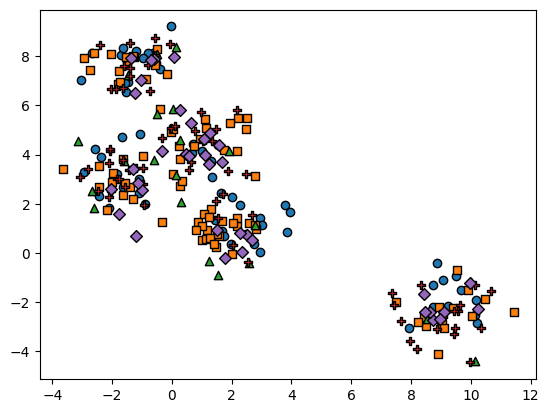

In [108]:
#군집된 label 유형별로 iteration하면서 marker별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor="k", marker=markers[label])
    
plt.show()

In [109]:
print(clusterDF['kmeans_label'].value_counts())

kmeans_label
1    86
3    69
0    60
4    37
2    21
Name: count, dtype: int64


### 5개의 군집으로 모여지긴 했지만 동일한 모형들이 모여지진 않음, 성능을 평가할 수 없음

## 2) Elbow Method
- 군집분석(특히, KMeans 분석)에서 군집수를 결정하는 방법
- Cluster 간의 거리의 합을 나타내는 inertia가 급격히 떨어지는 구간이 생기는데 이 지점의 K 값을 군집의 개수로 사용

![43191elbow_img.png](img/43191elbow_img.png)

In [82]:
def visualize_elbowmethod(data, param_init='random', param_n_init=10, param_max_iter=300):
    distortions = []
    for i in range(1, 20):
        km = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)

    plt.plot(range(1, 20), distortions, marker='o')
    plt.xlabel('Number of Cluster')
    plt.ylabel('inertia')

    plt.show()

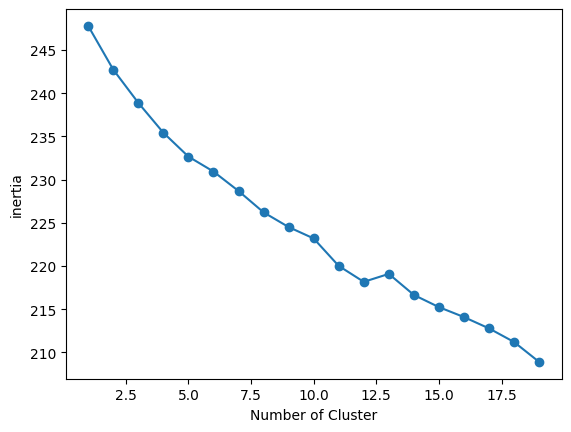

In [83]:
#1. 사용하고자 하는 클러스터 범위를 지정한다.
#2. 각 클러스터를 WCSS방법으로 계산을 합니다.
#3. WCSS값과 클러스터 K 갯수에 대한 커브선을 그립니다.
#4. 뾰족하게 구부러진 부분이나 특정 지점이 팔처럼 굽어지는 부분을 K로 지정합니다. 
visualize_elbowmethod(feature_vect)

## 3) 실루엣 분석(silhouette analysis)
- 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
- 효율적으로 잘 분리 = 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있음
- 실루엣 계수(silhouette coefficient) 기반: 개별 데이터가 가지는 군집화 지표

![silouette01.png](img/silouette01.png)
![silouette07.png](img/silouette07.png)

> -1 에서 1 사이의 값을 가지며, 1에 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 의미

## **좋은 군집화**
- 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score() 값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
- 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엑 계수의 평균값에서 크게 벗어나지 않는 것이 중요




## 4) 평가 결과
- 기초 모델 hiring data set Silhouette Analysis Score: 0.01661
- 수치로 평가하기에는 너무나 작은 값
- 조금이라도 성능을 올리기 위해 형태소 분석(konlpy), 데이터 전처리(lower) 진행
- 군집 갯수에 따라 성능변화를 알아본 결과 25개로 군집으로 나누었을때 가장 좋은 실루엣 계수값이 나옴(best n: 25 best score: 0.0359)

In [84]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
#실루엣 분석 평가 지표값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#모든 개별 데이터에 실루엣 계수값을 구함

score_samples = silhouette_samples(feature_vect, df['cluster_label'])
print('silhouette_samples() return 값의 shape', score_samples.shape)


#데이터에 실루엣 계수 칼럼 추가
df['sil_coeff'] = score_samples

average_score = silhouette_score(feature_vect, df['cluster_label'])
print('hiring data set Silhouette Analysis Score:' ,round(average_score, 5))

silhouette_samples() return 값의 shape (273,)
hiring data set Silhouette Analysis Score: 0.01661


In [120]:
df.groupby('cluster_label')['sil_coeff'].mean()

cluster_label
0    0.025012
1    0.010433
2    0.000330
3    0.056627
4   -0.001221
Name: sil_coeff, dtype: float64

cluster_label
0    0.025012
1    0.010433
2    0.000330
3    0.056627
4   -0.001221
Name: sil_coeff, dtype: float64

In [85]:
k_range = range(2, 30)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    km_cluster = KMeans(n_clusters=k, max_iter=200, random_state=0)
    km_cluster.fit(feature_vect)
    clusters = km_cluster.predict(feature_vect)
    
    score = silhouette_score(feature_vect, clusters)
    print('k:', k, 'score:', score)
    
    if score > best_silhouette_score :
        best_n = k
        best_silhouette_score = score
        
print('best n:', best_n, 'best score:', best_silhouette_score)
#https://steadiness-193.tistory.com/285


k: 2 score: 0.010636497159254035
k: 3 score: 0.014868196552693
k: 4 score: 0.01795580261818645
k: 5 score: 0.01660991992518273
k: 6 score: 0.021377059866355932
k: 7 score: 0.01963914566499625
k: 8 score: 0.02750125938304457
k: 9 score: 0.027315833620331083
k: 10 score: 0.022003393395161924
k: 11 score: 0.022574817284028655
k: 12 score: 0.021948224311912713
k: 13 score: 0.02358470812510448
k: 14 score: 0.027980211586339322
k: 15 score: 0.026512042675254793
k: 16 score: 0.027490827015927935
k: 17 score: 0.02619436227486447
k: 18 score: 0.026073302865088938
k: 19 score: 0.026776230962257182
k: 20 score: 0.026559106905395514
k: 21 score: 0.03203530069657745
k: 22 score: 0.03299083995846745
k: 23 score: 0.03375214154476383
k: 24 score: 0.03435910445446567
k: 25 score: 0.03593497810544761
k: 26 score: 0.03457394322300571
k: 27 score: 0.03531215416627506
k: 28 score: 0.03509020325318228
k: 29 score: 0.034392435680901785
best n: 25 best score: 0.03593497810544761


### 5 cluster: 0.01
### 10 cluster: 0.02
### 20 cluster: 0.02

k: 2 score: 0.01732096124433374
k: 3 score: 0.013953858197318219
k: 4 score: 0.01076884139188643
k: 5 score: 0.009417040501864324
k: 6 score: 0.011019065163934106
k: 7 score: 0.01615601633337342
k: 8 score: 0.011818761102773728
k: 9 score: 0.012979047814641877
k: 10 score: 0.016436241719045206
k: 11 score: 0.013217725910756503
k: 12 score: 0.014623131677124692
k: 13 score: 0.01623773166339237
k: 14 score: 0.015525246537211521
k: 15 score: 0.015540380021476353
k: 16 score: 0.018632193910099005
k: 17 score: 0.021053383158674204
k: 18 score: 0.021115787402483502
k: 19 score: 0.021914449818631526
k: 20 score: 0.022090539685268654
k: 21 score: 0.032019173809212854
k: 22 score: 0.03273261422463707
k: 23 score: 0.03186004025372212
k: 24 score: 0.03190289141684729
k: 25 score: 0.03285297908907763
k: 26 score: 0.03294975543293448
k: 27 score: 0.033527295181889905
k: 28 score: 0.032901993641493564
k: 29 score: 0.032921291911816565
best n: 27 best score: 0.033527295181889905

In [116]:
cluster_details = get_cluster_details(cluster_model=km_cluster, 
                                      cluster_data=df, 
                                      feature_names=feature_names, 
                                      clusters_num = 8, 
                                      top_n_features=20)

In [117]:
#Kmeans 군집화 객체(label), 핵심 단어 추출, 회사명 반환
print_cluster_details(cluster_details)

####### Cluster 0
Top Features: ['경험', '운영', '있으신', '구축', '클라우드', '인프라', 'kubernetes', '환경', 'aws', '보안', '아키텍처', '대한', '시스템', '이상', '서비스', 'linux', '설계', '보유', 'jenkins', 'docker']
hiring filename: ['디플래닉스', '와디즈', '피어테크', '이스트소프트', '씨제이올리브네트웍스(CJ올리브네트웍스)', '트리플콤마', '일렉트로닉아츠코리아']
####### Cluster 1
Top Features: ['경험', '개발', '있으신', 'aws', '있는', '대한', '이해', '서비스', 'react', '하는', '보유', '사용', '기술', '이상', '운영', '하고', '설계', 'sap', '으로', 'typescript']
hiring filename: ['롯데헬스케어', '스윗코리아', '제제소프트', '디노마드', '롯데헬스케어', '앤서스랩코리아', '오케스트로']
####### Cluster 2
Top Features: ['경험', '있으신', '개발', '관련', 'learning', '프로젝트', 'ros', '석사', '있으며', '하는', '혹은', '투자', '기꺼이', '시간', '대한', 'cc', '경력', '성취', '강한', 'linux']
hiring filename: ['플래티어', '파수', '컨트롤웍스', '디오에프연구소', '유진로봇', '크로커스', '플라잎']
####### Cluster 3
Top Features: ['qa', '테스트', '경험', '품질', '능력', 'sw', '대한', '있으신', '커뮤니케이션', '보유', 'jira', '지식', '가능하신', 'confluence', '게임', '업무', '개발', '경력', '이해', '작성']
hiring filename: ['모비두', '제로엑스플로우', '미리디', '가야데이터', 

# 6. 결론

- 수치화된 모델 평가보다는 직접적인 데이터 군집 비교가 효과적
- 그러기엔 한눈에 볼수 있는 10개 미만의 군집으로 군집갯수 선택
- 10개 미만 군집화 중에 실루엣계수가 가장 높은 8개 군집으로 모델링 진행

####### Cluster 0 `클라우드/aws/데이터인프라 구축 채용`

Top Features: '경험', '운영', '있으신', '구축', '클라우드', '인프라', 'kubernetes', '환경', 'aws', '보안', '아키텍처', '대한', '시스템', '이상', '서비스', 'linux', '설계', '보유', 'jenkins', 'docker']
hiring filename: '디플래닉스', '와디즈', '피어테크', '이스트소프트', '씨제이올리브네트웍스(CJ올리브네트웍스)', '트리플콤마', '일렉트로닉아츠코리아'


####### Cluster 1 `aws/sap/개발 경력 채용`

Top Features: '경험', '개발', '있으신', 'aws', '있는', '대한', '이해', '서비스', 'react', '하는', '보유', '사용', '기술', '이상', '운영', '하고', '설계', 'sap', '으로', 'typescript'
hiring filename: '롯데헬스케어', '스윗코리아', '제제소프트', '디노마드', '롯데헬스케어', '앤서스랩코리아', '오케스트로'


####### Cluster 2 `개발/투자/석사/linux 경력 채용`

Top Features: '경험', '있으신', '개발', '관련', 'learning', '프로젝트', 'ros', '석사', '있으며', '하는', '혹은', '투자', '기꺼이', '시간', '대한', 'cc', '경력', '성취', '강한', 'linux'
hiring filename: '플래티어', '파수', '컨트롤웍스', '디오에프연구소', '유진로봇', '크로커스', '플라잎'


####### Cluster 3 `sw/품질/jira/게임 경력 채용`

Top Features: 'qa', '테스트', '경험', '품질', '능력', 'sw', '대한', '있으신', '커뮤니케이션', '보유', 'jira', '지식', '가능하신', 'confluence', '게임', '업무', '개발', '경력', '이해', '작성'
hiring filename: \'모비두', '제로엑스플로우', '미리디', '가야데이터', '무하유', '아드리엘', '롯데정보통신'


####### Cluster 4 `데이터/분석/python/통계/시각화 경력 채용`

Top Features: '데이터', '분석', '경험', 'sql', 'python', '있으신', '있는', '이상', '관련', 'bi', '통계', '구축', '시각', '경력', '활용', 'tableau', 'google', '대한', '비즈니스', 'etl'
hiring filename: '워트인텔리전스', '핀다', '웅진', '비포플레이', '딥노이드', '애자일소다', '휴맥스모빌리티'


####### Cluster 5 `외국계/데이터/경험 채용`

Top Features: 'and', 'in', 'experience', 'to', 'of', 'the', 'with', 'ability', 'or', 'work', 'data', 'understanding', 'skills', 'technical', 'it', 'at', 'have', '문서', 'center', 'knowledge'
hiring filename: '몰로코', '피엠인터내셔널코리아', '몰로코', '아마존웹서비시즈코리아', '아마존웹서비시즈코리아', '아마존웹서비시즈코리아', '42dot'


####### Cluster 6 `인공지능/개발/머신러닝/비전 경령 채용`

Top Features: 'ai', '경험', '개발', 'cncf', '모델', 'pytorch', 'opencv', '아래', '지능', '인공', 'tensorflow', 'langchain', 'aiops', 'processing', 'learning', 'python', 'ml', '에코', '이미지', 'vision'
hiring filename: '제로원에이아이', '디에스앤지', '피처링', '제로원에이아이', '다비오', '제로원에이아이', '디오에프연구소'


####### Cluster 7 `머신러닝/딥러닝/논문/최신 경력 채용`

Top Features: '러닝', 'tensorflow', 'pytorch', '경험', '있으신', '데이터', '머신', '모델', '논문', 'python', '관련', '최신', 'ai', '이런', 'deeplearning', '개발', '있는', '인공', '지능', 'machinelearning'
hiring filename: '무브멘토', '마크클라우드', '로보코리아', '인터엑스', '인터엑스', '인터엑스', '인터엑스'

![maxresdefault.jpg](img/maxresdefault.jpg)

# 7. 마치며

    - 제일 자신 없던 영역이 크롤링이었는데, 이번 기회에 정말 원없이 연습해봤습니다.
    
    - 공부를 하는 목적인 취업정보를 시간낭비 없이 보고 싶어서 진행한 프로젝트여서 목적은 달성한 거 같습니다.
    
    - 함부로 크롤링해오다가는 해당 사이트 접근이 막혀버릴 수도 있다는 것을 알게 되었습니다...
    
    - 예전부터 제대로 하고 싶었던 텍스트 마이닝을 관심있는 주제로 크롤링부터 차근차근 할수 있었던 좋은 기회였습니다
    
    - 역시 벡터화/형태소 분석 등 데이터 전처리에 시간과 공수가 많이 들었음
    
    - 사이트에서 어느 정도 정해놓은 형식은 있지만 채용공고를 회사들 나름대로 작성해 분석하는데 어려움이 많습니다. 기술적인 역량을 키워야하는 필요성을 뼈저리게...
    
    - GPT활용을 극한으로 끌어올리는 경험을 해봤습니다. 물론 기본적인 코드 구현은 직접 할 줄 알아야 하지만, GPT를 활용하여 코드 구현 시간을 최소화할 수 있을 것 같습니다.


# 8. 회고 및 미래 작업 방향

####     - 현재 채용 중인 공고뿐만 아니라 앞으로 나올 공고도 계속적으로 더 많은 표본을 수집해 나가고 싶다.

####    - 현재 우리가 수집한 회사 규모 및 형태, 조회수, 좋아요 등에 대한 분석을 더 해볼 예정이다.

####    - KMean cluster 말고도 문서 유사도를 활용해서 **개인이 원하는 채용정보 기준으로 유사한 값의 채용 공고를 추천 프로그램 가능**
     